# Глава: 🗽 Американские эропорты ✈️

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url_airport = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url_weather = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

data_a = pd.read_csv(url_airport, sep=',')
data_w = pd.read_csv(url_weather, sep=',')

### 🔎 Для начала рассмотрим среднее значение задержки рейса по каждому дню каждого месяца 🔎

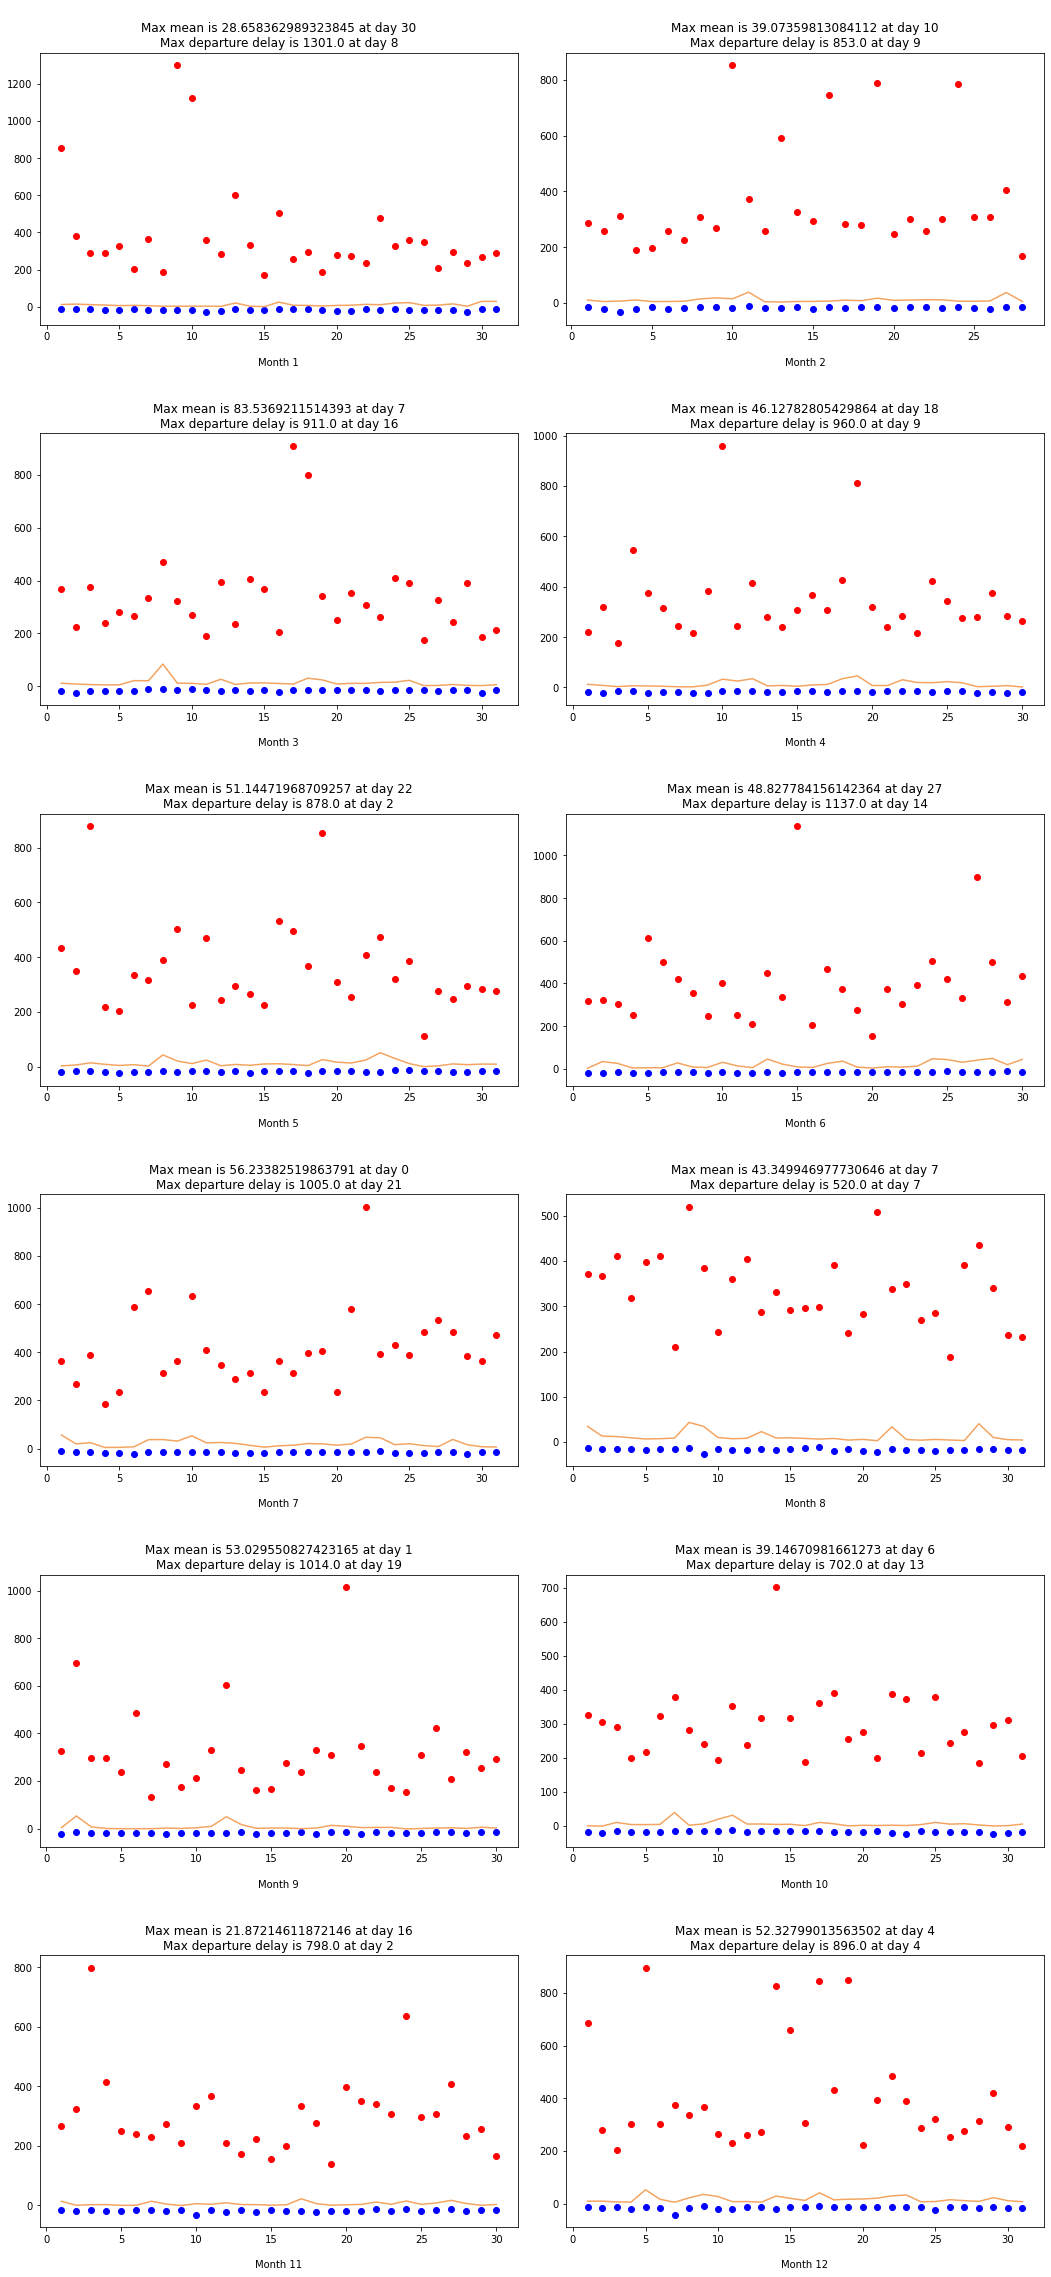

In [28]:
def func(i):
    
    obs = data_a[data_a["month"] == i]
    obs_g = obs.groupby('day')['dep_delay']
    
    plt.scatter(np.arange(1, obs['day'].max()+1), obs_g.max(), color = 'red')
    plt.scatter(np.arange(1, obs['day'].max()+1), obs_g.min(), color = 'blue')
    plt.plot( np.arange(1, obs['day'].max() + 1), obs.groupby('day')['dep_delay'].mean(), color = 'sandybrown')
    plt.xlabel("\nMonth " + str(i))
    plt.title("\nMax mean is " + str(obs.groupby('day')['dep_delay'].mean().max()) + " at day "+ str(np.argmax(obs.groupby('day')['dep_delay'].mean()))+ "\nMax departure delay is " + str(obs.groupby('day')['dep_delay'].max().max())+ " at day " +str(np.argmax(obs.groupby('day')['dep_delay'].max()))) 

plt.figure(figsize=(18,40))
plt.subplots_adjust(wspace= 0.1, hspace= 0.4)
for i in range(1,13):
    plt.subplot(6,2,i)
    func(i)


plt.show()

### Видно, что особый интерес представляют:
### ✅ 8ое число 3его месяца (из-за наибольшего среднего);
### ✅ 9ое число 1ого месяца (наибольшее максимальное значение).

### Будем разбираться c 08.03.2013 🕵🏻‍♂️

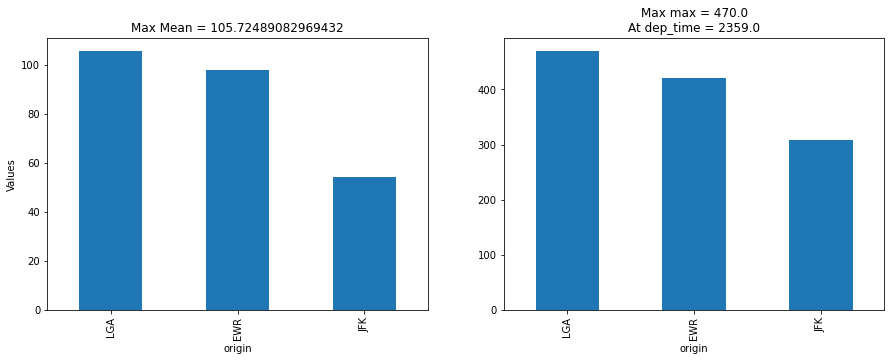

In [134]:
show_mean = data_a[(data_a['month'] == 3) & (data_a['day'] == 8)].groupby('origin')['dep_delay'].mean().sort_values()[::-1]
show_max = data_a[(data_a['month'] == 3) & (data_a['day'] == 8)].groupby('origin')['dep_delay'].max().sort_values()[::-1]


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("Max Mean = " + str(show_mean.max()))
plt.ylabel("Values")
show_mean.plot.bar()

plt.subplot(1, 2, 2)
plt.title("Max max = " + str(show_max.max()) + "\nAt dep_time = " + str(data_a_obs.sort_values(by = "dep_delay", ascending=False).max()["dep_time"]))
show_max.plot.bar()

plt.show()

### В этот день была наибольшая средняя задержка. Посмотрим, что происходило с погодой 8ого марта

In [120]:
data_w[(data_w["month"] == 3) & (data_w["day"] == 8)]

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1580,1581,EWR,2013,3.0,8.0,0.0,35.60,33.80,93.08,350.0,16.11092,18.540125,0.00,NaN,6.00
1581,1582,EWR,2013,3.0,8.0,1.0,35.06,32.00,88.47,340.0,16.11092,18.540125,0.00,1018.6,6.00
1582,1583,EWR,2013,3.0,8.0,2.0,35.06,32.00,88.47,350.0,13.80936,15.891535,0.01,1018.2,6.00
1583,1584,EWR,2013,3.0,8.0,3.0,33.80,32.00,93.03,340.0,11.50780,13.242946,0.02,NaN,2.00
1584,1585,EWR,2013,3.0,8.0,4.0,33.98,32.00,92.36,330.0,10.35702,11.918651,0.04,1017.9,2.00
1585,1586,EWR,2013,3.0,8.0,5.0,33.80,32.00,93.03,330.0,8.05546,9.270062,0.02,NaN,1.50
1586,1587,EWR,2013,3.0,8.0,6.0,33.08,32.00,95.75,330.0,10.35702,11.918651,0.04,1017.6,1.50
1587,1588,EWR,2013,3.0,8.0,7.0,33.08,30.92,91.66,330.0,10.35702,11.918651,0.00,1016.8,2.00
1588,1589,EWR,2013,3.0,8.0,8.0,33.08,30.92,91.66,340.0,11.50780,13.242946,0.01,1016.3,2.00
1589,1590,EWR,2013,3.0,8.0,9.0,33.80,30.20,86.49,340.0,14.96014,17.215830,0.00,NaN,1.50


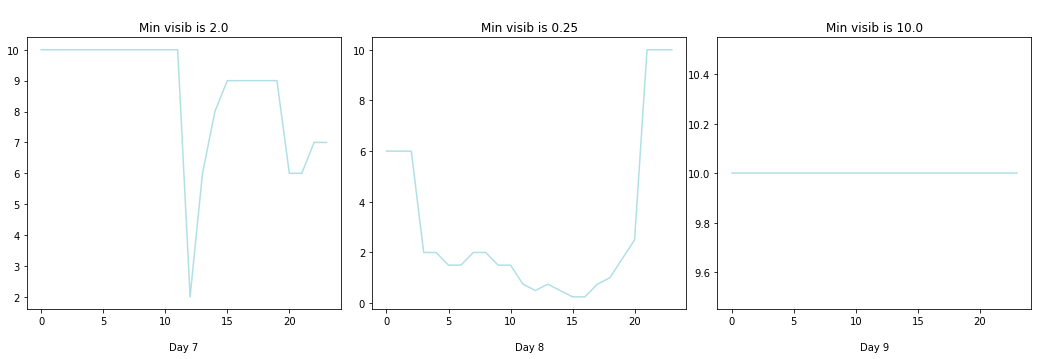

In [130]:
def func_w(i):
    
    data_w_3_month = data_w[data_w["month"] == 3]
    
    data_obser = data_w_3_month[data_w_3_month["day"] == i]
    
    plt.plot(data_obser["hour"], data_obser["visib"], color = 'powderblue')

    plt.xlabel("\nDay " + str(i))
    plt.title( "\nMin visib is " + str(data_obser["visib"].min()) ) 

plt.figure(figsize=(18,40))
plt.subplots_adjust(wspace= 0.1, hspace= 0.4)
for i in range(1,4):
    plt.subplot(6,3,i)
    func_w(i+6)



### Видим, что в период с 3 до 20 часов была низкая видимость, из-за чего большинство рейсов пришлось перенести до улучшения видимости. 🌞
### А рейс, который задержали на 470 минут = 7 часов 50 минут, отправился в 23 часа 59 минут, так как восьмью часами ранее, в 16 часов, была наименьшая видимость = 0.25

## Будем разбираться c 09.01.2013 🕵🏻‍♂️

In [141]:
data_a[(data_a["month"] == 1) & (data_a["day"] == 9)].sort_values(by = "dep_delay", ascending=False)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
7072,7073,2013,1,9,641.0,1301.0,1242.0,1272.0,HA,N384HA,51,JFK,HNL,640.0,4983,6.0,41.0
7887,7888,2013,1,9,2223.0,253.0,111.0,247.0,UA,N465UA,477,EWR,LAS,329.0,2227,22.0,23.0
7301,7302,2013,1,9,1041.0,156.0,1135.0,140.0,EV,N12924,4688,EWR,MHT,35.0,209,10.0,41.0
7883,7884,2013,1,9,2158.0,148.0,18.0,125.0,DL,N324NB,1715,LGA,MSY,179.0,1183,21.0,58.0
7453,7454,2013,1,9,1407.0,107.0,1737.0,124.0,B6,N598JB,209,JFK,LGB,344.0,2465,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,7896,2013,1,9,NaN,NaN,NaN,NaN,9E,NaN,4023,EWR,CVG,NaN,569,NaN,NaN
7896,7897,2013,1,9,NaN,NaN,NaN,NaN,AA,N3BVAA,739,LGA,DFW,NaN,1389,NaN,NaN
7897,7898,2013,1,9,NaN,NaN,NaN,NaN,AA,N3BWAA,759,LGA,DFW,NaN,1389,NaN,NaN
7898,7899,2013,1,9,NaN,NaN,NaN,NaN,AA,N466AA,1855,LGA,STL,NaN,888,NaN,NaN


### Максимальная задержка рейса была на 1301 минут =  21 часов 41 минут. Самолёт взлетел в 6 часов 41 минуту из аэропорта John F. Kennedy International Airport (JFK) и прилетел в аэропорт в Гонолулу в Daniel K. Inouye International Airport (HNL) находящийся на западе. Посмотрим на погоду 21 часами ранее - 8ого января в 9 часов 00 минут

In [143]:
data_w[(data_w["month"] == 1) & (data_w["day"] == 8)]

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
167,168,EWR,2013,1.0,8.0,0.0,39.92,21.02,46.41,0.0,0.00000,0.000000,0.0,1029.3,10.0
168,169,EWR,2013,1.0,8.0,1.0,39.92,21.02,46.41,0.0,0.00000,0.000000,0.0,1029.1,10.0
169,170,EWR,2013,1.0,8.0,2.0,37.04,24.08,59.09,0.0,0.00000,0.000000,0.0,1028.9,10.0
170,171,EWR,2013,1.0,8.0,3.0,35.96,23.00,58.94,230.0,3.45234,3.972884,0.0,1029.3,10.0
171,172,EWR,2013,1.0,8.0,4.0,32.00,23.00,69.04,210.0,6.90468,7.945768,0.0,1029.2,10.0
172,173,EWR,2013,1.0,8.0,5.0,32.00,23.00,69.04,210.0,3.45234,3.972884,0.0,1029.2,10.0
173,174,EWR,2013,1.0,8.0,6.0,32.00,24.08,72.24,210.0,6.90468,7.945768,0.0,1029.0,10.0
174,175,EWR,2013,1.0,8.0,7.0,32.00,24.98,75.00,190.0,3.45234,3.972884,0.0,1028.7,10.0
175,176,EWR,2013,1.0,8.0,8.0,30.92,26.06,81.95,190.0,4.60312,5.297178,0.0,1028.2,10.0
176,177,EWR,2013,1.0,8.0,9.0,30.02,24.98,81.27,240.0,4.60312,5.297178,0.0,1028.6,10.0


### Видим, что с 4 до 13 часов 8ого числа была повышена влажность, а в 9 часов, во время рейса, влажность была максимальная = 81%

### Таким образом, рейс, который должен был вылетать утром 8ого числа в 9 часов, был перенесён на следующее утро на 6 часов. 

### Ну и напротив, в 5-17 часов 9ого числа, когда погода была благоприятной, самолёты взлетали по рассписанию (с минимальной дисперсией)

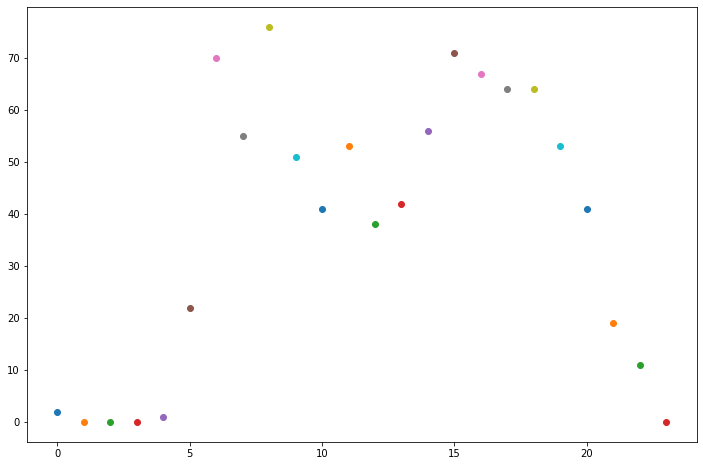

Всего перелётов 9ого января: 902




,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
191,192,EWR,2013,1.0,9.0,0.0,39.92,30.92,69.96,200.0,5.75390,6.621473,0.0,1028.7,10.0
192,193,EWR,2013,1.0,9.0,1.0,39.02,30.02,69.86,210.0,5.75390,6.621473,0.0,1028.6,10.0
193,194,EWR,2013,1.0,9.0,2.0,37.94,28.94,69.73,210.0,3.45234,3.972884,0.0,1028.6,10.0
194,195,EWR,2013,1.0,9.0,3.0,37.94,28.94,69.73,210.0,4.60312,5.297178,0.0,1029.3,10.0
195,196,EWR,2013,1.0,9.0,4.0,37.04,28.94,72.24,230.0,4.60312,5.297178,0.0,1029.2,10.0
196,197,EWR,2013,1.0,9.0,5.0,35.96,28.94,75.39,0.0,0.00000,0.000000,0.0,1029.1,10.0
197,198,EWR,2013,1.0,9.0,6.0,33.98,28.94,81.57,0.0,0.00000,0.000000,0.0,1028.7,10.0
198,199,EWR,2013,1.0,9.0,7.0,35.06,28.94,78.13,0.0,0.00000,0.000000,0.0,1028.5,10.0
199,200,EWR,2013,1.0,9.0,8.0,35.96,30.02,78.79,0.0,0.00000,0.000000,0.0,1028.4,10.0
200,201,EWR,2013,1.0,9.0,9.0,35.96,28.94,75.39,0.0,0.00000,0.000000,0.0,1028.2,10.0


In [256]:
plt.figure(figsize=(12,8))
for i in range(24):
    my_len =len(data_a[(data_a["month"] == 1) & (data_a["day"] == 9) & (data_a["hour"] == i)])
    plt.scatter(i, my_len)
    
plt.show()

print("Всего перелётов 9ого января:", len(data_a[(data_a["month"] == 1) & (data_a["day"] == 9)]))

print("\n")

data_w[(data_w["month"] == 1) & (data_w["day"] == 9)]